In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

c:\Users\brain\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 加載MNIST資料集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 預處理圖像資料
X_train = X_train.reshape((60000, 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255

In [4]:
# 編碼標籤
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# 建構模型
model_mnist = models.Sequential()
model_mnist.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
model_mnist.add(layers.Dense(10, activation='softmax'))

In [6]:
# 編譯模型
model_mnist.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# 訓練模型
model_mnist.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2413 - accuracy: 0.9292
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0909 - accuracy: 0.9730
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0589 - accuracy: 0.9823
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0411 - accuracy: 0.9875
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0296 - accuracy: 0.9912


In [8]:
# 預測
y_pred_mnist = model_mnist.predict(X_test)
y_pred_classes_mnist = np.argmax(y_pred_mnist, axis=1)
y_true_mnist = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 3ms/step


In [9]:
# 計算性能指標
precision_mnist = precision_score(y_true_mnist, y_pred_classes_mnist, average='weighted')
recall_mnist = recall_score(y_true_mnist, y_pred_classes_mnist, average='weighted')
f1_mnist = f1_score(y_true_mnist, y_pred_classes_mnist, average='weighted')

print(f'Classification metrics for MNIST dataset:')
print(f'Precision: {precision_mnist:.4f}')
print(f'Recall: {recall_mnist:.4f}')
print(f'F1 Score: {f1_mnist:.4f}')

Classification metrics for MNIST dataset:
Precision: 0.9802
Recall: 0.9801
F1 Score: 0.9801


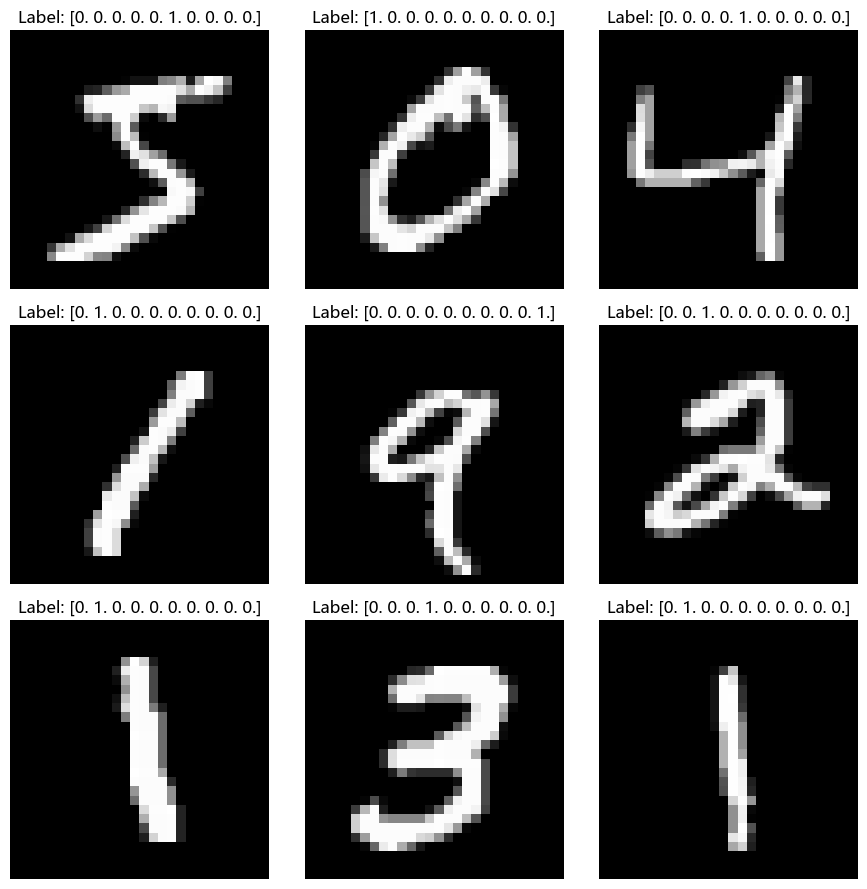

In [10]:
# 設置 Matplotlib 的字體
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 支援中文的字體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號「-」顯示為方塊的問題

# 展示前9個手寫數字圖片
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = X_train[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
def build_model(n_layers, n_units, input_shape=(28 * 28,), num_classes=10):
    model = Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=input_shape))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 實驗配置
experiments = [
    {'n_layers': 1, 'n_units': 32},
    {'n_layers': 2, 'n_units': 32},
    {'n_layers': 3, 'n_units': 32},
    {'n_layers': 1, 'n_units': 64},
    {'n_layers': 2, 'n_units': 64},
    {'n_layers': 3, 'n_units': 64},
]

epochs_list = [5, 10]
batch_size_list = [64, 128]

results = []

# 進行實驗
for exp in experiments:
    for epochs in epochs_list:
        for batch_size in batch_size_list:
            model = build_model(exp['n_layers'], exp['n_units'])
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # 計算訓練資料的性能指標
            y_pred_train = model.predict(X_train)
            y_pred_classes_train = np.argmax(y_pred_train, axis=1)
            y_true_train = np.argmax(y_train, axis=1)
            
            precision_train = precision_score(y_true_train, y_pred_classes_train, average='weighted')
            recall_train = recall_score(y_true_train, y_pred_classes_train, average='weighted')
            f1_train = f1_score(y_true_train, y_pred_classes_train, average='weighted')
            
            # 計算測試資料的性能指標
            y_pred_test = model.predict(X_test)
            y_pred_classes_test = np.argmax(y_pred_test, axis=1)
            y_true_test = np.argmax(y_test, axis=1)
            
            precision_test = precision_score(y_true_test, y_pred_classes_test, average='weighted')
            recall_test = recall_score(y_true_test, y_pred_classes_test, average='weighted')
            f1_test = f1_score(y_true_test, y_pred_classes_test, average='weighted')
            
            # 記錄結果
            results.append({
                '隱藏層數量': exp['n_layers'],
                '神經元數量': exp['n_units'],
                '週期數': epochs,
                '批次大小': batch_size,
                '訓練精確度': precision_train,
                '訓練召回率': recall_train,
                '訓練F1分數': f1_train,
                '測試精確度': precision_test,
                '測試召回率': recall_test,
                '測試F1分數': f1_test
            })

# 將結果轉換為DataFrame並顯示
results_df = pd.DataFrame(results)
print(results_df)

313/313 [==============================] - 1s 2ms/step
    隱藏層數量  神經元數量  週期數  批次大小     訓練精確度     訓練召回率    訓練F1分數     測試精確度   測試召回率  \
0       1     32    5    64  0.966461  0.966283  0.966257  0.962696  0.9626   
1       1     32    5   128  0.960102  0.960083  0.960027  0.954267  0.9542   
2       1     32   10    64  0.976131  0.976067  0.976040  0.967850  0.9678   
3       1     32   10   128  0.970786  0.970767  0.970758  0.963988  0.9639   
4       2     32    5    64  0.970540  0.970500  0.970497  0.961932  0.9619   
5       2     32    5   128  0.962941  0.962767  0.962673  0.955752  0.9553   
6       2     32   10    64  0.983225  0.983200  0.983200  0.970503  0.9704   
7       2     32   10   128  0.974586  0.974483  0.974441  0.964028  0.9638   
8       3     32    5    64  0.971992  0.971817  0.971812  0.966435  0.9663   
9       3     32    5   128  0.965615  0.965317  0.965237  0.957365  0.9569   
10      3     32   10    64  0.979319  0.979100  0.979058  0.966774  0.9662 